In [270]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

### Reading in of various dataframes from 'Processed' folder

In [271]:
pos_cases_df = pd.read_csv('Data/Processed/positive_cases.csv')
pos_cases_df.head()

,Date,Estimate of number testing positive,Proportion of population that had COVID
0,12/07/2020,23600,0.000435
1,19/07/2020,27700,0.000500
2,26/07/2020,35700,0.000667
3,02/08/2020,28300,0.000526
4,09/08/2020,28300,0.000526


In [272]:
eighteenth_Dec_df = pd.read_csv('Data/Processed/18_Dec.csv')
eighteenth_Dec_df.head()

,Region,Mechanical Ventilation (MV),All Beds,Non MV Beds,Percentage on MV
0,East of England,116.0,1802.0,1686.0,6.4
1,London,311.0,2726.0,2415.0,11.4
2,Midlands,246.0,3289.0,3043.0,7.5
3,North East and Yorkshire,137.0,2396.0,2259.0,5.7
4,North West,159.0,2255.0,2096.0,7.1


In [273]:
all_beds_df = pd.read_csv('Data/Processed/all_beds_df.csv')
all_beds_df.drop('Unnamed: 0', 1, inplace=True)
all_beds_df.head()

,Name,01-08-2020,02-08-2020,03-08-2020,04-08-2020,05-08-2020,06-08-2020,07-08-2020,08-08-2020,09-08-2020,...,13-12-2020,14-12-2020,15-12-2020,16-12-2020,17-12-2020,18-12-2020,19-12-2020,20-12-2020,21-12-2020,22-12-2020
0,East of England,85.0,80.0,73.0,69.0,70.0,72.0,60.0,59.0,59.0,...,1432.0,1506.0,1502.0,1734.0,1770.0,1802.0,1943.0,1954.0,2163.0,2205.0
1,London,126.0,120.0,122.0,118.0,111.0,113.0,105.0,126.0,107.0,...,2212.0,2330.0,2482.0,2543.0,2607.0,2726.0,2909.0,3067.0,3367.0,3559.0
2,Midlands,216.0,194.0,206.0,182.0,181.0,179.0,178.0,96.0,101.0,...,3276.0,3286.0,3097.0,3191.0,3292.0,3289.0,3293.0,3203.0,3389.0,3447.0
3,North East and Yorkshire,117.0,120.0,115.0,123.0,128.0,132.0,111.0,117.0,117.0,...,2353.0,2483.0,2482.0,2505.0,2494.0,2396.0,2413.0,2464.0,2530.0,2496.0
4,North West,191.0,188.0,181.0,181.0,183.0,160.0,160.0,154.0,136.0,...,2266.0,2325.0,2322.0,2276.0,2271.0,2255.0,2253.0,2315.0,2399.0,2406.0


In [274]:
MV_beds_df = pd.read_csv('Data/Processed/MV_df.csv')
MV_beds_df.drop('Unnamed: 0', 1, inplace=True)
MV_beds_df.head()

,Name,01-08-2020,02-08-2020,03-08-2020,04-08-2020,05-08-2020,06-08-2020,07-08-2020,08-08-2020,09-08-2020,...,13-12-2020,14-12-2020,15-12-2020,16-12-2020,17-12-2020,18-12-2020,19-12-2020,20-12-2020,21-12-2020,22-12-2020
0,East of England,9.0,9.0,8.0,8.0,8.0,9.0,9.0,11.0,9.0,...,99.0,103.0,103.0,108.0,113.0,116.0,124.0,121.0,120.0,127.0
1,London,16.0,15.0,17.0,15.0,13.0,11.0,10.0,10.0,12.0,...,256.0,262.0,292.0,291.0,301.0,311.0,322.0,355.0,378.0,400.0
2,Midlands,13.0,10.0,10.0,13.0,13.0,14.0,10.0,5.0,6.0,...,278.0,257.0,251.0,254.0,257.0,246.0,254.0,243.0,257.0,252.0
3,North East and Yorkshire,9.0,8.0,7.0,7.0,7.0,6.0,7.0,8.0,7.0,...,147.0,145.0,144.0,142.0,145.0,137.0,152.0,149.0,149.0,154.0
4,North West,15.0,15.0,13.0,13.0,13.0,13.0,13.0,14.0,14.0,...,165.0,161.0,162.0,159.0,159.0,159.0,162.0,156.0,165.0,153.0


In [275]:
daily_deaths_df = pd.read_csv('Data/Processed/daily_deaths.csv')
daily_deaths_df.drop('Unnamed: 0', 1, inplace=True)
daily_deaths_df.head()

,NHS England Region,02-03-2020,03-03-2020,05-03-2020,06-03-2020,08-03-2020,09-03-2020,10-03-2020,11-03-2020,12-03-2020,...,18-12-2020,19-12-2020,20-12-2020,21-12-2020,22-12-2020,23-12-2020,24-12-2020,25-12-2020,26-12-2020,27-12-2020
0,East Of England,1,0,0,1,0,1,0,0,0,...,34,42,42,55,40,39,24,28,24,5
1,London,0,0,0,1,0,1,0,5,6,...,39,38,50,54,48,50,41,35,24,9
2,Midlands,0,1,0,0,2,1,0,2,6,...,76,54,65,77,64,55,47,53,38,7
3,North East And Yorkshire,0,0,0,0,0,0,0,0,0,...,54,47,48,33,50,41,41,39,31,8
4,North West,0,0,1,0,1,0,0,0,2,...,46,45,36,47,47,41,29,23,24,4


### Function to find range of all the columns in each dataframe, pick the one with the highest range and then display summary statistics ('.describe()')

In [276]:
def range_of_dataframe(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df = df[numeric_columns]
    max_column_index = (df.max() - df.min()).idxmax()
    print(f"The column with the highest range is: {max_column_index}")
    print(df[max_column_index])
    print()
    print(df[max_column_index].describe().round(1))
    print()
    print()

print("all_beds_df: ")
range_of_dataframe(all_beds_df)
print("MV_beds_df: ")
range_of_dataframe(MV_beds_df)
print("daily_deaths_df: ")
range_of_dataframe(daily_deaths_df)
print("pos_cases_df:")
range_of_dataframe(pos_cases_df)
print("eighteenth_Dec_df:")
range_of_dataframe(eighteenth_Dec_df)



all_beds_df: 
The column with the highest range is: 16-11-2020
0     856.0
1    1474.0
2    3274.0
3    3473.0
4    3158.0
5    1182.0
6     896.0
Name: 16-11-2020, dtype: float64

count       7.0
mean     2044.7
std      1196.7
min       856.0
25%      1039.0
50%      1474.0
75%      3216.0
max      3473.0
Name: 16-11-2020, dtype: float64


MV_beds_df: 
The column with the highest range is: 22-12-2020
0    127.0
1    400.0
2    252.0
3    154.0
4    153.0
5    197.0
6     56.0
Name: 22-12-2020, dtype: float64

count      7.0
mean     191.3
std      110.0
min       56.0
25%      140.0
50%      154.0
75%      224.5
max      400.0
Name: 22-12-2020, dtype: float64


daily_deaths_df: 
The column with the highest range is: 08-04-2020
0    111
1    239
2    186
3    107
4    127
5     83
6     47
Name: 08-04-2020, dtype: int64

count      7.0
mean     128.6
std       64.5
min       47.0
25%       95.0
50%      111.0
75%      156.5
max      239.0
Name: 08-04-2020, dtype: float64


pos_cases_d

### Plotting histograms

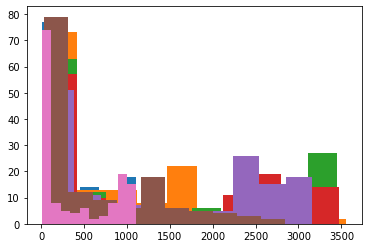

In [277]:
all_beds_df_transpose = all_beds_df.T
new_header = all_beds_df_transpose.iloc[0]
all_beds_df_transpose = all_beds_df_transpose[1:]
all_beds_df_transpose.columns = new_header

regions_list = ['East of England', 'London', 'Midlands', 'North East and Yorkshire','North West','South East','South West' ]

for region in regions_list:
    plt.hist(all_beds_df_transpose[region])



### Function to compute z-scores for all numeric columns and to save the new dataframe

In [278]:
def z_score(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].apply(zscore)
    return df


z_score(all_beds_df).to_csv('Data/Processed/z_all_beds_df.csv')
z_score(MV_beds_df).to_csv('Data/Processed/z_MV_beds_df.csv')
z_score(daily_deaths_df).to_csv('Data/Processed/z_daily_deaths_df.csv')
z_score(pos_cases_df).to_csv('Data/Processed/z_pos_cases_df.csv')
z_score(eighteenth_Dec_df).to_csv('Data/Processed/z_eighteenth_Dec_df.csv')

### Measuring the skewness of a distribution

In [279]:
print(z_score(all_beds_df).skew(axis=0))

01-08-2020   -0.164846
02-08-2020   -0.358260
03-08-2020   -0.172778
04-08-2020   -0.382472
05-08-2020   -0.248625
                ...   
18-12-2020   -0.543925
19-12-2020   -0.574612
20-12-2020   -0.873443
21-12-2020   -0.821899
22-12-2020   -0.684191
Length: 144, dtype: float64
